We need to make this:

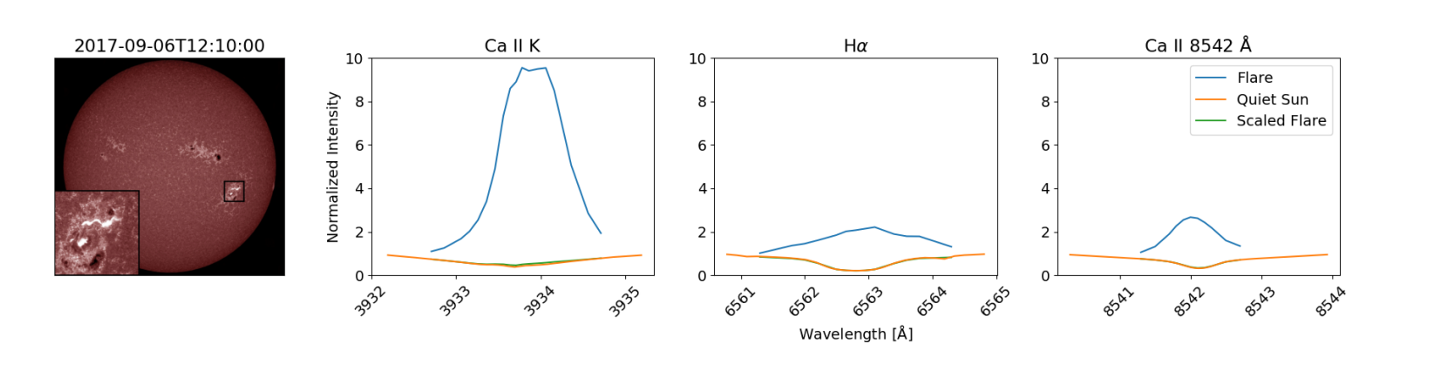

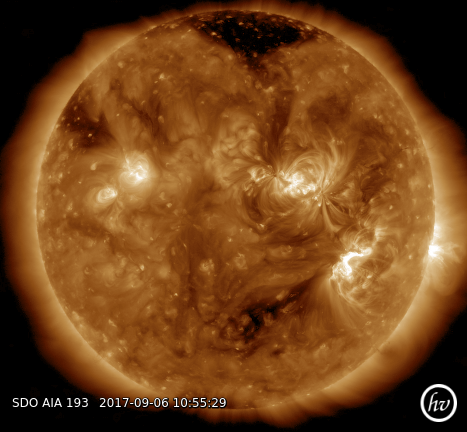

![2017_09_06_10_55_33_AIA_193 (3).png](<attachment:2017_09_06_10_55_33_AIA_193 (3).png>)

In [1]:
import sys
sys.path.append('e:\solar flares\data\\2017-09-06')

import numpy as np
import matplotlib.pyplot as plt
import use_nessi as un
import use_nessi2 as un2
# import os
from importlib import reload

# from matplotlib import cm
# import matplotlib.cbook as cbook
# import matplotlib.colors as colors
# from scipy.interpolate import interp1d
from PIL import Image
from matplotlib import transforms



sr = solar_radius = 959.63
area_factor = 60**2/np.pi/sr**2

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_18872\2576846856.py:2: SyntaxWarning: invalid escape sequence '\s'
  sys.path.append('e:\solar flares\data\\2017-09-06')


In [17]:
lines = ["CaII17", "Ha17", "CaK17" ]


    
def get_data(lines):
    data = un.load_for_further_analysis(lines, un.get_full_path(lines[0]))
    for line in lines:
        if "CaK" in line:
            un2.disgard_cont_point(line, data)
    
    return data 

data = get_data(lines)

def get_Nessi(name_of_line):
    wav_nessi, fov_nessi, saas_nessi = data[f"nessi_{name_of_line}"]
    return wav_nessi, fov_nessi, saas_nessi
    
def get_FOV(name_of_line):
    time = data[f"TIME_{name_of_line}"]

    FOV = data[f"FOV_{name_of_line}"]
    wav_qs, qs_spec, std_qs = data[f"quiet_sun_{name_of_line}"]
    return wav_qs, time, FOV

def get_composed_spec(name_of_line):
    wav, DFD, time, line, std  = un2.difference_FD_data(name_of_line, data, quiet_sun_subtraction=False, num=100,area_factor=2.5*60**2/np.pi/959.63**2, add_noise=False)
    return wav , DFD + line 

def plot_Nessi(ax, line):
    wav_nessi, fov_nessi, saas_nessi = get_Nessi(line)
    ax.plot(wav_nessi, fov_nessi, label="FOV NESSI")
    ax.plot(wav_nessi, saas_nessi, label="SAAS NESSI")
    
def plot_FOV(ax, line, frame):
    wav_qs, time, FOV = get_FOV(line)
    if 'Ha' in line:
        plot_pixel(ax, wav_qs)
        frame=30
    else:
        ax.plot(wav_qs, FOV[frame], label="flare profile")

    wav , full = get_composed_spec(line)
    ax.plot(wav, full[frame], '--', label="scaled flare")

    ax.set_title(f'{latex_name(line)}') # at {un.time_hulp(time[frame] + un.hulp_time("11:53:00"))}')
    
    
def plot_pixel(ax,wav):
    P = [1.2570316, 1.6008017, 1.8352637, 2.4310818, 2.5809662, 2.6837046, 2.6218596, 2.5489583, 2.5635176, 2.4375014, 2.269423, 2.0090542, 1.3497262]
    ax.plot(wav, P, label="Pixel SST")
    
    
def latex_name(name): 
    names = {"Ha":r"$\rm{H}\alpha$", 
             "CaK":r'$\rm{Ca}~\rm{II}~\rm{K}$', 
             "CaII":r'$\rm{Ca}~\rm{II}~8542~\rm{\AA}$', 
             "Fe6173":r'$\rm{Fe}~I~6173~\rm{\AA}$', 
             "Hbeta":r'$\rm{H}\beta$', 
             "CaK(2)":r'$\rm{Ca}~\rm{II}~\rm{H}$', 
             "He":r'$\rm{He}~I~5876\rm{\AA}$'}
    for k in names.keys():
        if k in name:
            return names[k]

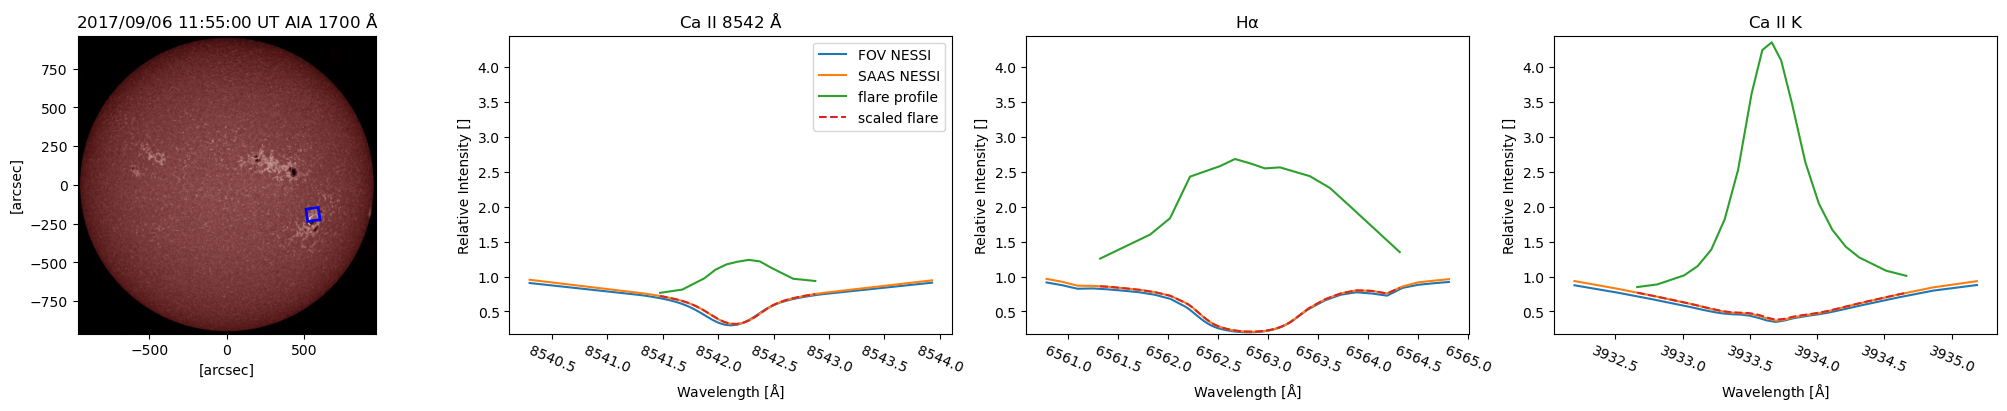

In [ ]:

# make figure
rows = 1
cols = len(lines) + 1
t = 1
fig, ax = plt.subplots(rows, cols, figsize=(5*t*cols,4*t*rows), constrained_layout=True)

title='additional plot'

# fig.suptitle(title, fontsize=20)

frame = 5

for i, line in enumerate(lines):
    plot_Nessi(ax[i+1], line)
    plot_FOV(ax[i+1], line, frame)
    ax[i+1].tick_params(axis='x', which='major', rotation=-23)  # Rotate x-ticks by 45 degrees  
    ax[i+1].set_ylim(0.18, 4.45)
    ax[i+1].set_xlabel(r'Wavelength [$\rm\AA$]')
    ax[i+1].set_ylabel('Relative Intensity []')
ax[1].legend()


import matplotlib.image as mpimg  # Import the image module
# Load the PNG image
img = mpimg.imread('E:\\solar flares\\data\\full_analysis\\2017_09_06_11_55_00_AIA_1700.png')  

# Display the image in the first subplot
ax[0].imshow(img, extent=(-962,963,-960,963))
ax[0].set_title(r'2017/09/06 11:55:00 UT AIA 1700 $\rm \AA$')
# ax[0].axis('off')  # Turn off axis labels and ticks
ax[0].set_xlabel('[arcsec]')
ax[0].set_ylabel('[arcsec]')



import matplotlib.patches as patches
import matplotlib.transforms as transforms

# Rectangle parameters
rect_x = 513-28  # X-coordinate of the rectangle's bottom-left corner
rect_y = -216-90  # Y-coordinate of the rectangle's bottom-left corner
rect_width = 60  # Width of the rectangle
rect_height = 60  # Height of the rectangle
angle = 8    # Rotation angle in degrees (counter-clockwise)

# Create a Rectangle patch
rect = patches.Rectangle((rect_x, rect_y), rect_width, rect_height, linewidth=1.5, edgecolor='blue', facecolor='none')

# Create a Transform object for rotation
transform = transforms.Affine2D().rotate_deg(angle)

# Add the transformation to the rectangle
rect.set_transform(transform + ax[0].transData) 

# Add the rectangle to the axes
ax[0].add_patch(rect)

# # Set plot limits to ensure the rectangle is visible
# ax[-1].set_xlim(0, 30)  # Adjust these limits based on your rectangle's position and size
# ax[-1].set_ylim(0, 30)

fig.savefig("E:\\solar flares\\data\\full_analysis\\full_plots\\NESSI_concept.pdf")

plt.show()

